In [2]:
import pandas as pd
import numpy as np
import seaborn as sns


In [4]:
file_path = "C:\\Users\\Sandra Kimiring\\OneDrive\\Desktop\\codesoft\\Titanic-Dataset.csv"
titanic_df = pd.read_csv(file_path)

In [10]:

print(titanic_df.head())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [11]:
print(titanic_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [14]:

print(titanic_df.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [15]:
print(titanic_df.isnull())

     PassengerId  Survived  Pclass   Name    Sex    Age  SibSp  Parch  Ticket  \
0          False     False   False  False  False  False  False  False   False   
1          False     False   False  False  False  False  False  False   False   
2          False     False   False  False  False  False  False  False   False   
3          False     False   False  False  False  False  False  False   False   
4          False     False   False  False  False  False  False  False   False   
..           ...       ...     ...    ...    ...    ...    ...    ...     ...   
886        False     False   False  False  False  False  False  False   False   
887        False     False   False  False  False  False  False  False   False   
888        False     False   False  False  False   True  False  False   False   
889        False     False   False  False  False  False  False  False   False   
890        False     False   False  False  False  False  False  False   False   

      Fare  Cabin  Embarked

In [16]:
print(titanic_df.isnull().sum())


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [17]:
titanic_df = titanic_df.drop(['PassengerId', 'Cabin'], axis=1)

In [19]:

titanic_df['Age'] = titanic_df['Age'].fillna(titanic_df['Age'].median())


In [21]:

titanic_df['Embarked'] = titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode()[0])


In [22]:
titanic_df['Sex'] = titanic_df['Sex'].map({'male': 1, 'female': 0})

In [23]:
titanic_df = pd.get_dummies(titanic_df, columns=['Embarked'], drop_first=True)

In [24]:
print("\nData after cleaning and encoding:")
print(titanic_df.head())
print("\nUpdated dataset info:")
print(titanic_df.info())


Data after cleaning and encoding:
   Survived  Pclass                                               Name  Sex  \
0         0       3                            Braund, Mr. Owen Harris    1   
1         1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...    0   
2         1       3                             Heikkinen, Miss. Laina    0   
3         1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)    0   
4         0       3                           Allen, Mr. William Henry    1   

    Age  SibSp  Parch            Ticket     Fare  Embarked_Q  Embarked_S  
0  22.0      1      0         A/5 21171   7.2500       False        True  
1  38.0      1      0          PC 17599  71.2833       False       False  
2  26.0      0      0  STON/O2. 3101282   7.9250       False        True  
3  35.0      1      0            113803  53.1000       False        True  
4  35.0      0      0            373450   8.0500       False        True  

Updated dataset info:
<class 'pandas.co

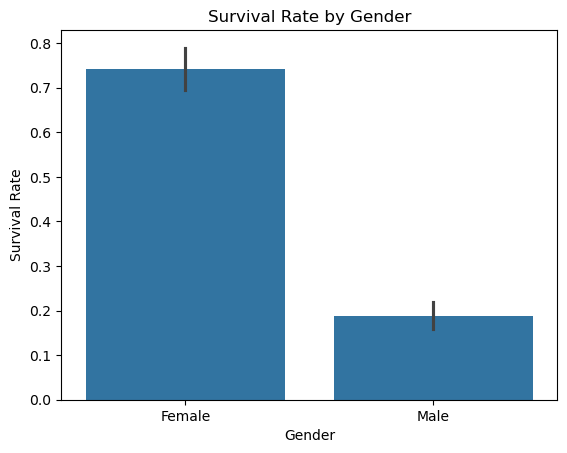

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x='Sex', y='Survived', data=titanic_df)
plt.title('Survival Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Survival Rate')
plt.xticks([0, 1], ['Female', 'Male'])
plt.show()


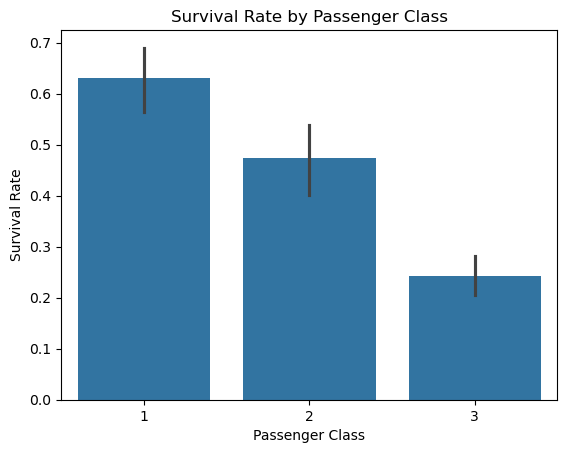

In [27]:
sns.barplot(x='Pclass', y='Survived', data=titanic_df)
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()


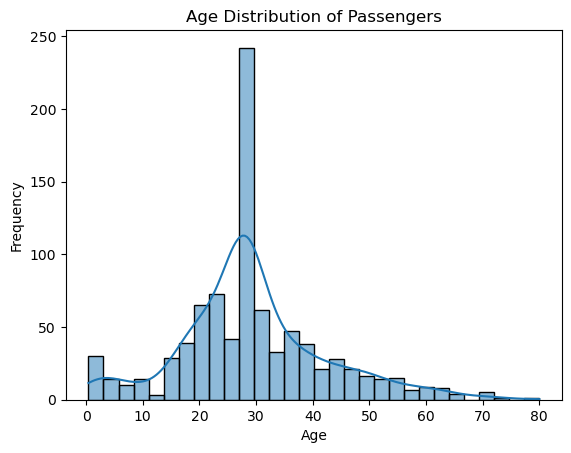

In [28]:
sns.histplot(titanic_df['Age'], bins=30, kde=True)
plt.title('Age Distribution of Passengers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


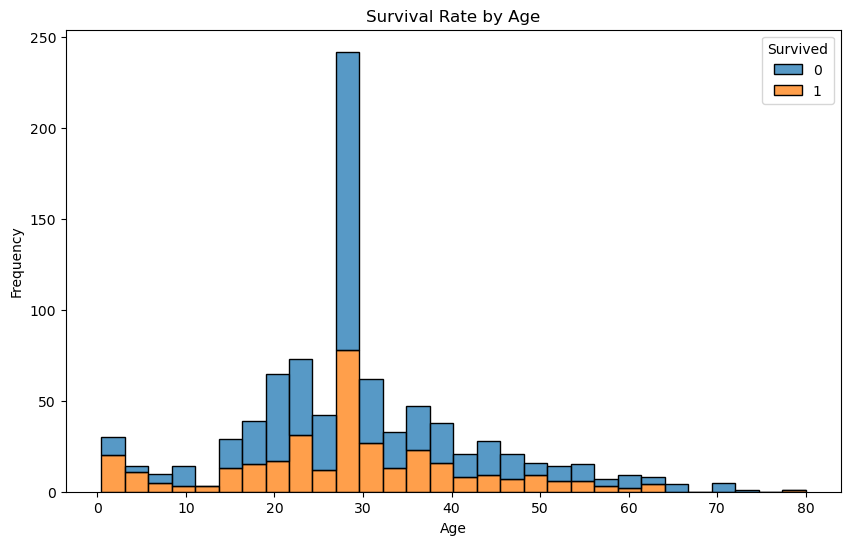

In [29]:
plt.figure(figsize=(10, 6))
sns.histplot(data=titanic_df, x='Age', hue='Survived', multiple='stack', bins=30)
plt.title('Survival Rate by Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


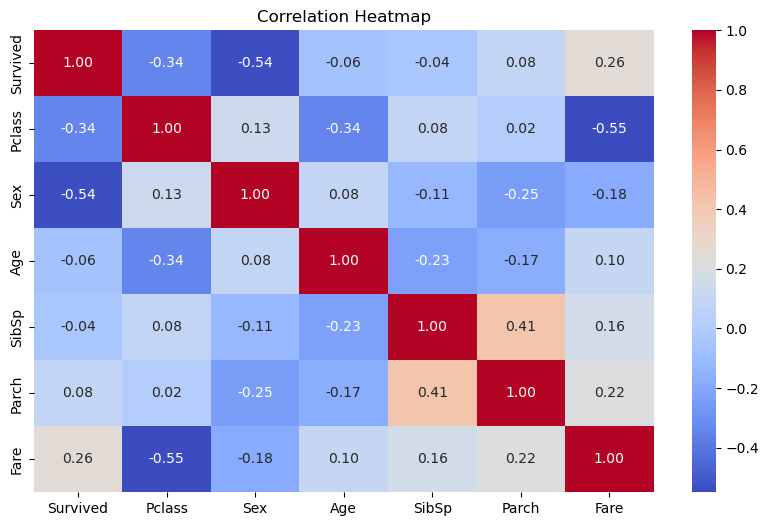

In [31]:
numeric_df = titanic_df.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [25]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [32]:
X = titanic_df.drop('Survived', axis=1)  # Features (everything except 'Survived')
y = titanic_df['Survived']                 # Target variable (Survived)

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
from sklearn.linear_model import LogisticRegression

# Initialize the model
model = LogisticRegression(max_iter=200)


In [39]:
# Check data types and identify non-numeric columns
print(X_train.dtypes)

# Check for missing values
print(X_train.isnull().sum())


Pclass          int64
Name           object
Sex             int64
Age           float64
SibSp           int64
Parch           int64
Ticket         object
Fare          float64
Embarked_Q       bool
Embarked_S       bool
dtype: object
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Embarked_Q    0
Embarked_S    0
dtype: int64


In [40]:
# Example for one-hot encoding for categorical columns
X_train = pd.get_dummies(X_train, drop_first=True)


In [41]:
# Fill missing values or drop them
X_train.fillna(value=0, inplace=True)  # or choose another method


In [51]:
# Initialize the model with a higher max_iter
model = LogisticRegression(max_iter=1000)  # Increase max_iter as needed


In [50]:
# Fit the model
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [55]:
if hasattr(model, 'coef_'):
    print("Model fitted successfully.")
else:
    print("Model is not fitted.")


Model is not fitted.


In [56]:
from sklearn.linear_model import LogisticRegression

# Initialize the model
model = LogisticRegression(max_iter=1000)

# Fit the model with training data
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [57]:
print(X_train.shape)
print(y_train.shape)


(712, 1276)
(712,)


In [58]:
# Fit the model
model.fit(X_train, y_train)

# Check coefficients
print(model.coef_)


[[-0.97627833 -2.74505341 -0.03217272 ... -0.19954334 -0.16242457
  -0.02670052]]


In [59]:
if hasattr(model, 'coef_'):
    print("Model fitted successfully.")
else:
    print("Model is not fitted.")


Model fitted successfully.


In [61]:
import pandas as pd

# Assuming X_train and X_test are your training and testing sets respectively
X_combined = pd.concat([X_train, X_test], keys=['train', 'test'])

# Perform one-hot encoding
X_combined = pd.get_dummies(X_combined, drop_first=True)

# Split back into train and test sets
X_train = X_combined.xs('train')
X_test = X_combined.xs('test')


In [63]:
# Fit the model
model.fit(X_train, y_train)

if hasattr(model, 'coef_'):
    print("Model fitted successfully.")
else:
    print("Model is not fitted.")


Model fitted successfully.


In [65]:
# Make predictions on the test set
y_pred = model.predict(X_test)



In [66]:
# Print the predictions
print("Predictions for the test set:")
print(y_pred)

Predictions for the test set:
[0 0 0 1 1 1 1 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 1 0 0 0
 1 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 0 1 0 1 1 1 0 1 1 0 0 1 0 0 0 1 1 1 1 1
 0 0 1 1 1 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1
 0 1 0 1 0 0 0 1 0 0 1 1 0 0 0 1 1 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 1 1 0 0
 1 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 1 1 0 1 0 0 0 1 1]


In [67]:
from sklearn.metrics import accuracy_score

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')


Accuracy: 0.80


In [68]:
from sklearn.metrics import classification_report

# Print the classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.82      0.85      0.83       105
           1       0.77      0.73      0.75        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



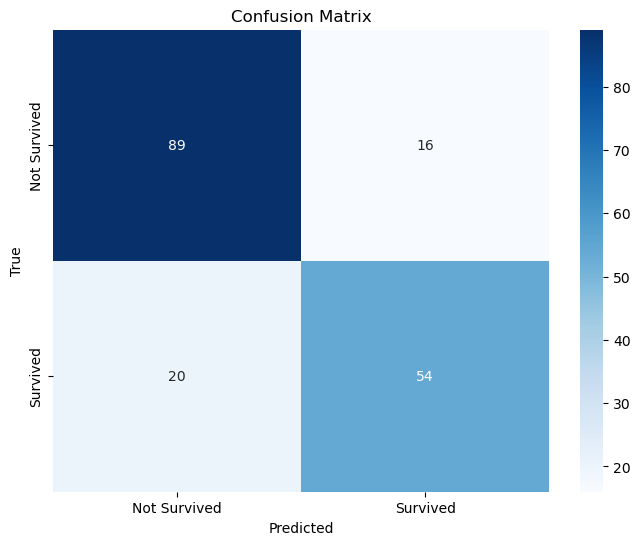

In [69]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Not Survived', 'Survived'], 
            yticklabels=['Not Survived', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [70]:
from sklearn.metrics import roc_auc_score

# Get the probability of the positive class
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f'ROC AUC Score: {roc_auc:.2f}')


ROC AUC Score: 0.88


In [71]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['lbfgs', 'liblinear']
}

grid_search = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)


Best parameters: {'C': 10, 'solver': 'liblinear'}


In [72]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Evaluate Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Random Forest Accuracy: {accuracy_rf:.2f}')


Random Forest Accuracy: 0.82


In [73]:
# Get feature importance for Logistic Regression
importance = model.coef_[0]
feature_names = X_train.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df)


                     Feature  Importance
785         Ticket_1601_True    1.522664
1183  Ticket_C.A. 37671_True    1.104286
1085      Ticket_367226_True    0.900805
1004      Ticket_347742_True    0.889143
913        Ticket_29106_True    0.886768
...                      ...         ...
1048      Ticket_349909_True   -0.898922
995       Ticket_347082_True   -0.915934
749       Ticket_113781_True   -0.929812
0                     Pclass   -0.974071
1                        Sex   -2.745477

[1622 rows x 2 columns]


In [77]:
import joblib

# Save the model to a file
joblib.dump(model, 'titanic_model.pkl')


['titanic_model.pkl']

In [78]:
pip install Flask


Note: you may need to restart the kernel to use updated packages.


In [ ]:
from flask import Flask, request, jsonify, render_template
import pandas as pd
import joblib

app = Flask(__name__)

# Load the model
model = joblib.load('titanic_model.pkl')

@app.route('/')
def home():
    return 'Welcome to the Titanic Survival Prediction App!'

@app.route('/predict', methods=['POST'])
def predict():
    features = [request.form['Pclass'],
                request.form['Sex'],
                request.form['Age'],
                request.form['SibSp'],
                request.form['Parch'],
                request.form['Fare'],
                request.form['Embarked']]
    
    # Convert to DataFrame for the model
    features_df = pd.DataFrame([features], columns=['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'])

    # Make prediction
    prediction = model.predict(features_df)
    
    return f'Prediction: {"Survived" if prediction[0] == 1 else "Not Survived"}'

if __name__ == '__main__':
    app.run(port=5000)


 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
127.0.0.1 - - [04/Nov/2024 02:20:18] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [04/Nov/2024 02:20:18] "GET /favicon.ico HTTP/1.1" 404 -
